In [143]:
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [182]:
data = pd.read_csv('~/eu15_00_17ccc.csv', index_col=0, parse_dates=True, dtype = {"Sales" : "float64"} )
data['Sales']=data['Sales'].div(1000).round(3)
data['Year'] = data.index.year.astype(str)
data['Month'] = data.index.month.astype(str)
data.head()


,Sales,Year,Month
Date,,,
2000-01-01,1266.668,2000,1
2000-02-01,1151.014,2000,2
2000-03-01,1716.626,2000,3
2000-04-01,1234.062,2000,4
2000-05-01,1390.952,2000,5


In [183]:
data.dtypes

Sales    float64
Year      object
Month     object
dtype: object

In [147]:
data[data['Sales'] == data['Sales'].max()]

,Sales,Year,Month
Date,,,
2017-03-01,1767.891,2017,3


In [148]:
data[data['Sales'] == data['Sales'].min()]

,Sales,Year,Month
Date,,,
2013-08-01,599.679,2013,8


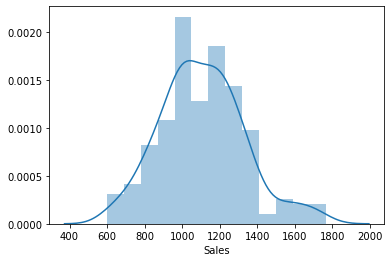

In [149]:
sns.distplot(data['Sales'])

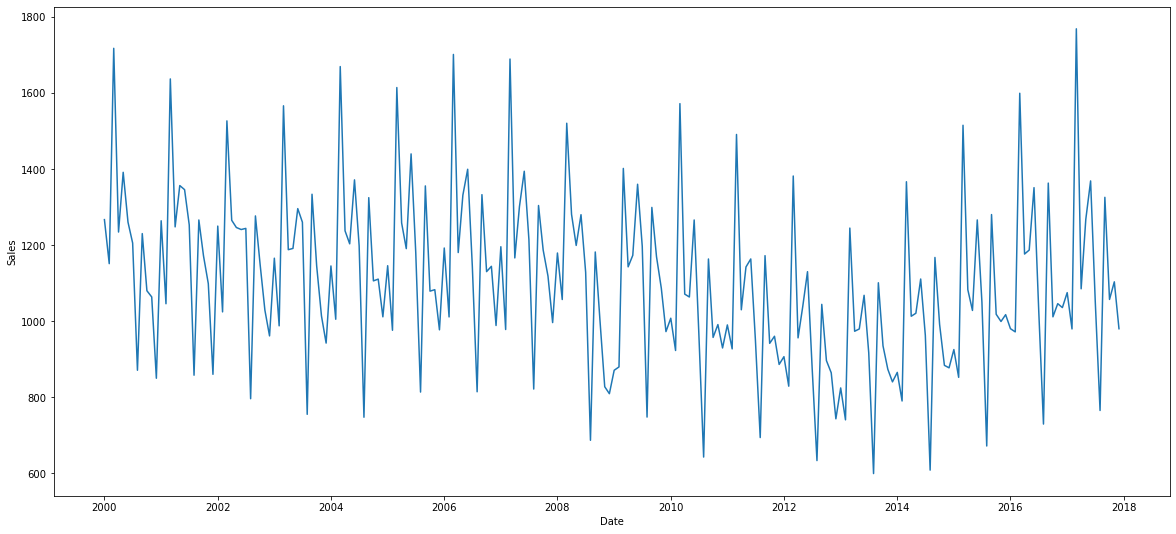

In [150]:
plt.figure(figsize=(20,9))
sns.lineplot(x=data.index, y='Sales', data=data)

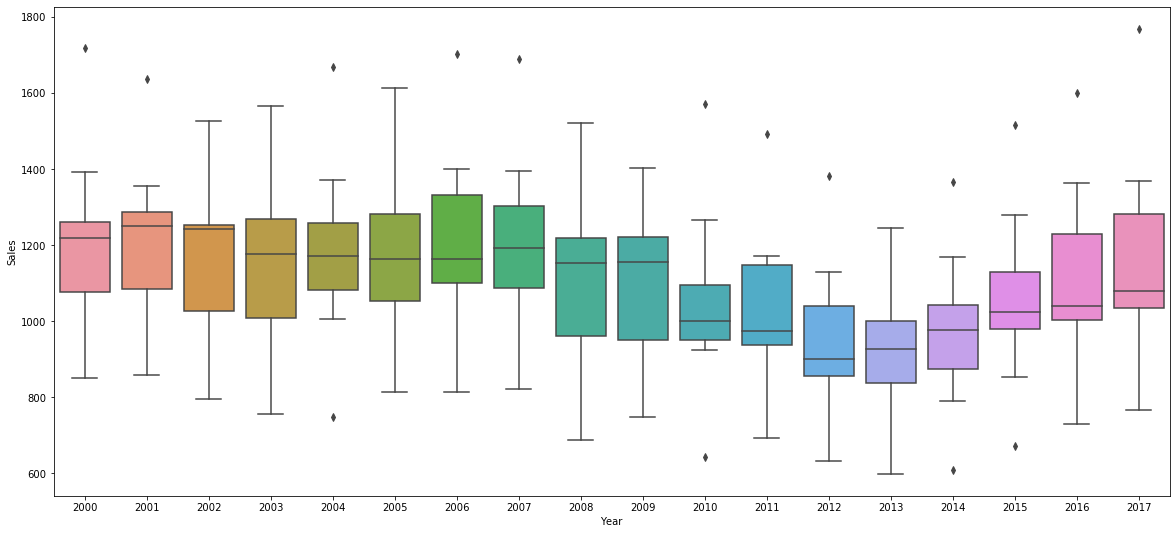

In [151]:
plt.figure(figsize=(20,9))
sns.boxplot(x='Year', y='Sales',
             data=data)


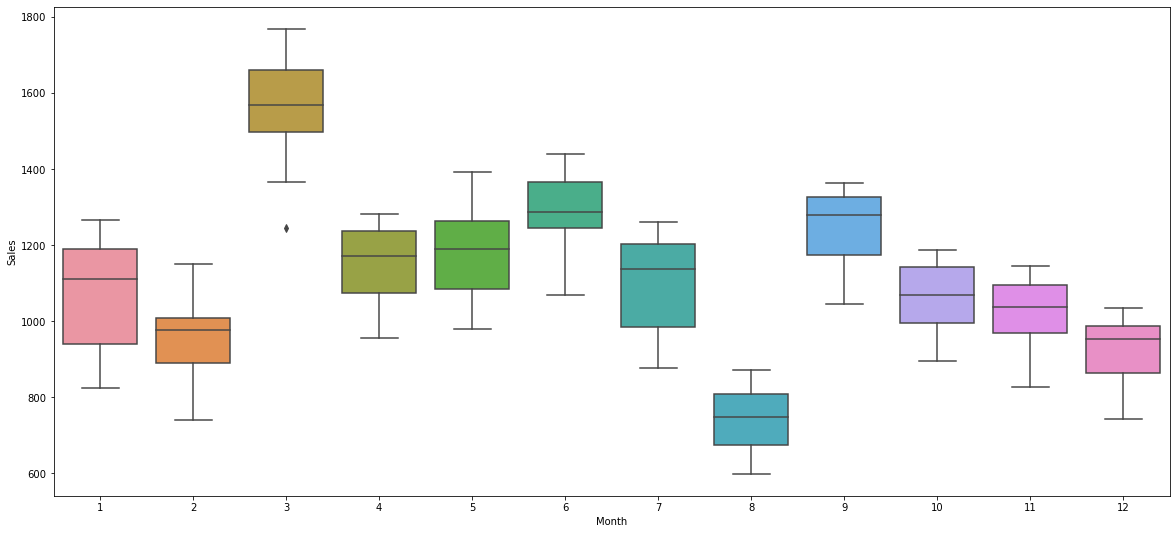

In [152]:
plt.figure(figsize=(20,9))
sns.boxplot(x='Month', y='Sales',
             data=data, order=['1','2','3','4','5','6','7','8','9','10','11','12'])


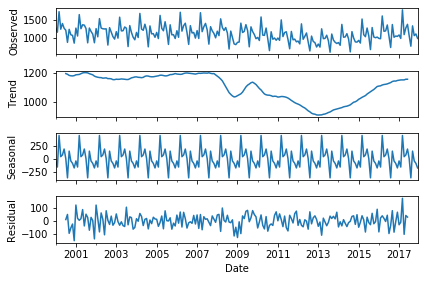

In [188]:


res = seasonal_decompose(data.Sales.interpolate(),
                                freq=12,
                                model='additive')
resplot = res.plot()



ADF Statistic: -1.6858403940296554
p-value: 0.43842230089546746


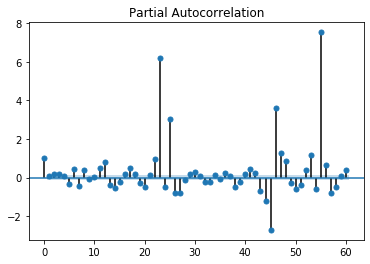

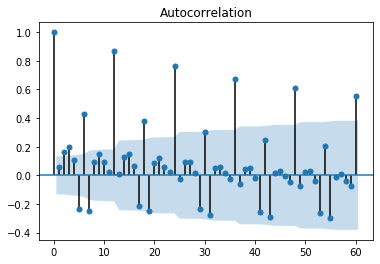

In [155]:

ad_fuller_result = adfuller(data['Sales'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

plot_pacf(data['Sales'], lags=60);
plot_acf(data['Sales'], lags=60);

In [156]:
data['Sales'] = data['Sales'].diff(periods=12)
data.head(15)



,Sales,Year,Month
Date,,,
2000-01-01,NaN,2000,1
2000-02-01,NaN,2000,2
2000-03-01,NaN,2000,3
2000-04-01,NaN,2000,4
2000-05-01,NaN,2000,5
2000-06-01,NaN,2000,6
2000-07-01,NaN,2000,7
2000-08-01,NaN,2000,8
2000-09-01,NaN,2000,9


In [157]:
data = data.drop(data.index[0:12])

data.head()

,Sales,Year,Month
Date,,,
2001-01-01,-2.994,2001,1
2001-02-01,-105.300,2001,2
2001-03-01,-80.383,2001,3
2001-04-01,13.520,2001,4
2001-05-01,-34.794,2001,5


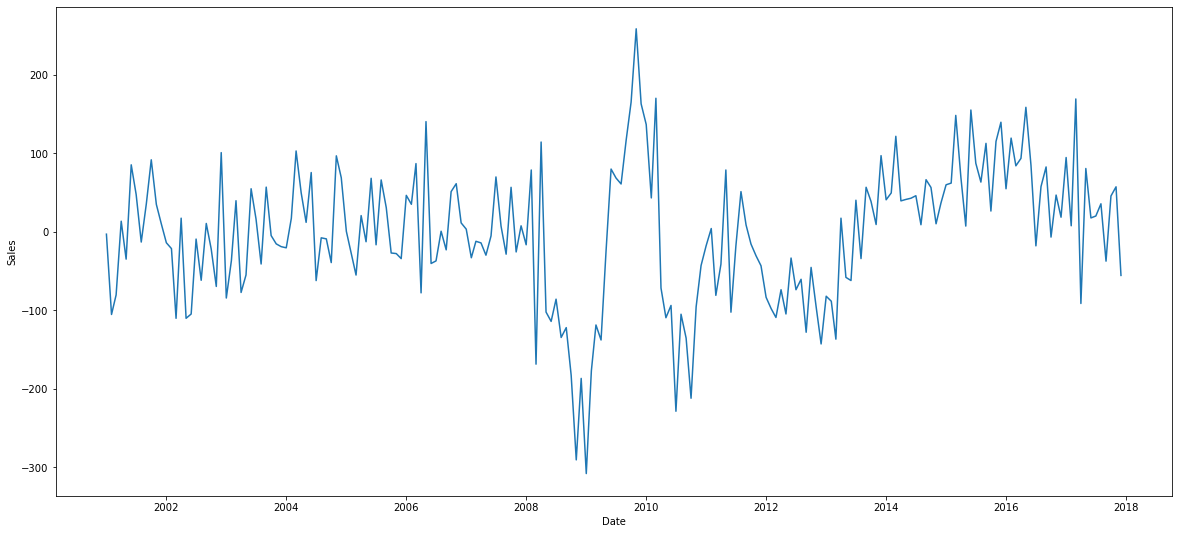

In [158]:
plt.figure(figsize=(20,9))
sns.lineplot(x=data.index, y='Sales', data=data)


ADF Statistic: -2.30265026350218
p-value: 0.17111463349734085


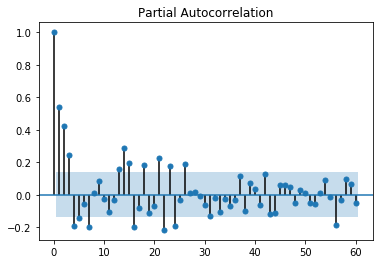

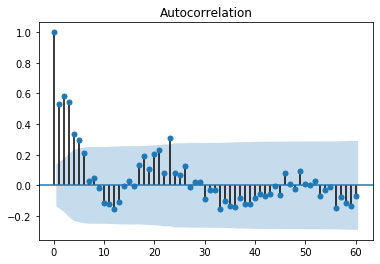

In [159]:
ad_fuller_result = adfuller(data['Sales'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

plot_pacf(data['Sales'], lags=60);
plot_acf(data['Sales'], lags=60);

In [160]:
data['Sales'] = data['Sales'].diff(periods=1)
data.head()



,Sales,Year,Month
Date,,,
2001-01-01,NaN,2001,1
2001-02-01,-102.306,2001,2
2001-03-01,24.917,2001,3
2001-04-01,93.903,2001,4
2001-05-01,-48.314,2001,5


In [161]:
data = data.drop(data.index[0])
data.head()

,Sales,Year,Month
Date,,,
2001-02-01,-102.306,2001,2
2001-03-01,24.917,2001,3
2001-04-01,93.903,2001,4
2001-05-01,-48.314,2001,5
2001-06-01,120.160,2001,6


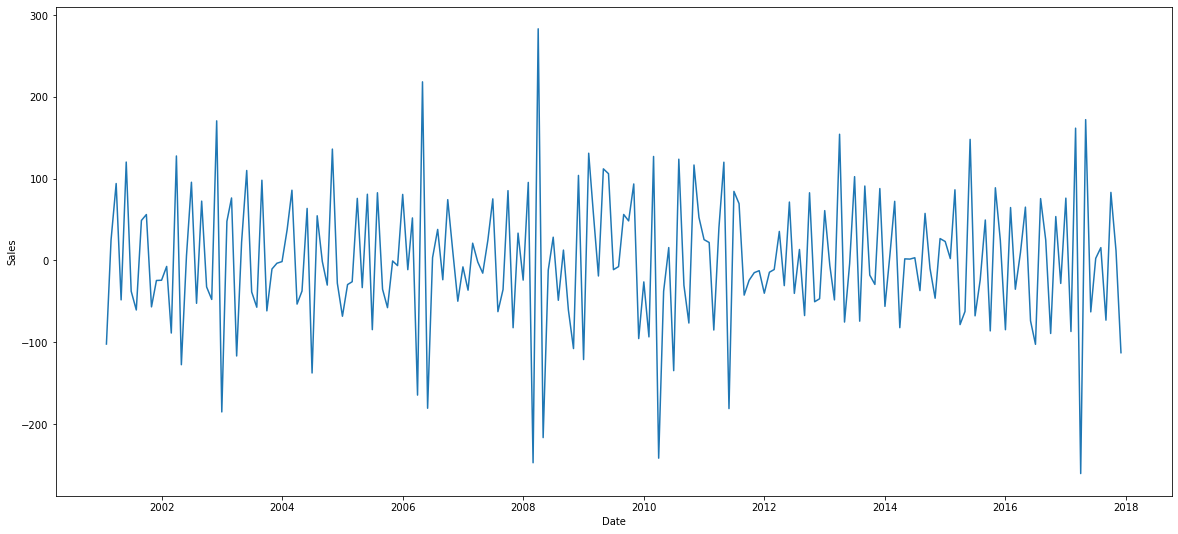

In [162]:
plt.figure(figsize=(20,9))
sns.lineplot(x=data.index, y='Sales', data=data)

ADF Statistic: -5.76391721641937
p-value: 5.589623758698112e-07


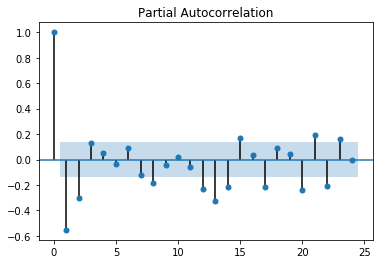

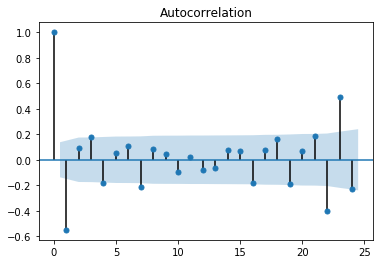

In [164]:
ad_fuller_result = adfuller(data['Sales'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

plot_pacf(data['Sales']);
plot_acf(data['Sales']);

In [179]:
best_model = SARIMAX(data['Sales'], order=(3, 1, 2), seasonal_order=(0, 1, 2, 12)).fit()
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                  216
Model:             SARIMAX(3, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -2544.916
Date:                            Sun, 09 Aug 2020   AIC                           5105.833
Time:                                    18:06:42   BIC                           5132.338
Sample:                                01-01-2000   HQIC                          5116.556
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3252      0.049    -26.847      0.000      -1.422      -1.228
ar.L2         -1.2517      0.053   

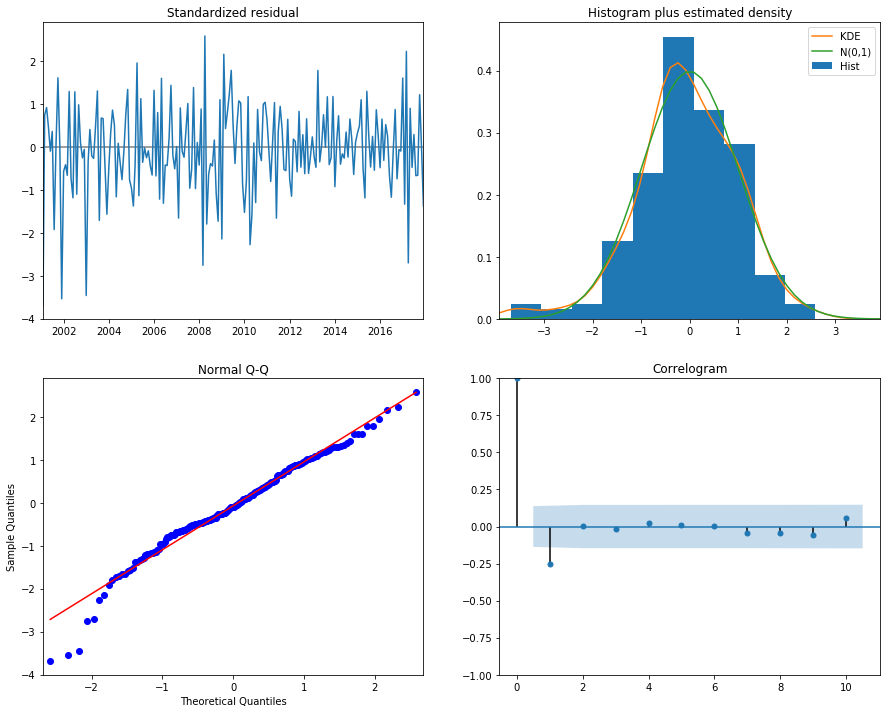

In [180]:
best_model.plot_diagnostics(figsize=(15,12));

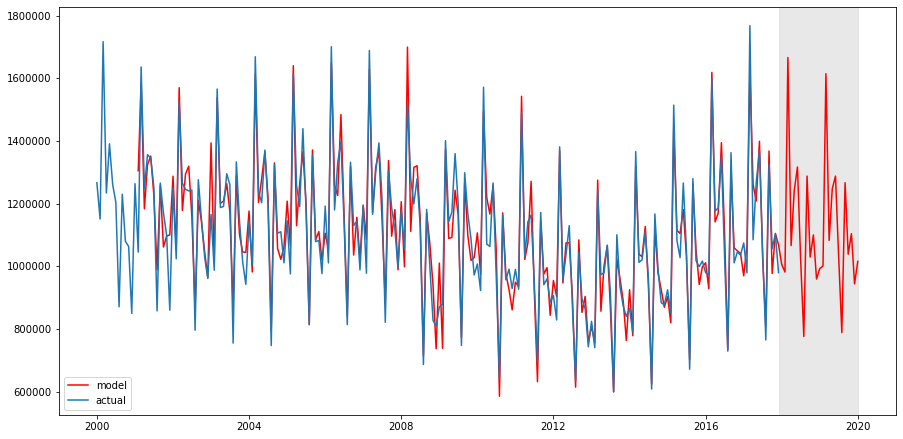

In [181]:
data['arima_model'] = best_model.fittedvalues
data['arima_model'][:12+1] = np.NaN

forecast = best_model.predict(start=data.shape[0], end=data.shape[0] + 24)
forecast = data['arima_model'].append(forecast)

plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='model')
plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(data['Sales'], label='actual')
plt.legend()

plt.show()